<a href="https://colab.research.google.com/github/sohahere/kaggle_projects/blob/main/Copy_of_Rock_vs_Mine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Data Processing

In [9]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('/content/Copy of sonar data.csv', header=None)

because the first coulumn is not header

In [10]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


multiple feature to visualize we will use pca

In [11]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [12]:
sonar_data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


M --> Mine

R --> Rock

In [14]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [15]:
# separating data and Labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [16]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Training and Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [19]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

Model Training --> Logistic Regression

always use standard scalar in distance based algorithm

In [20]:
model = LogisticRegression()

In [21]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [22]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [24]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [25]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7619047619047619


Making a Predictive System

In [26]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['M']
The object is a mine


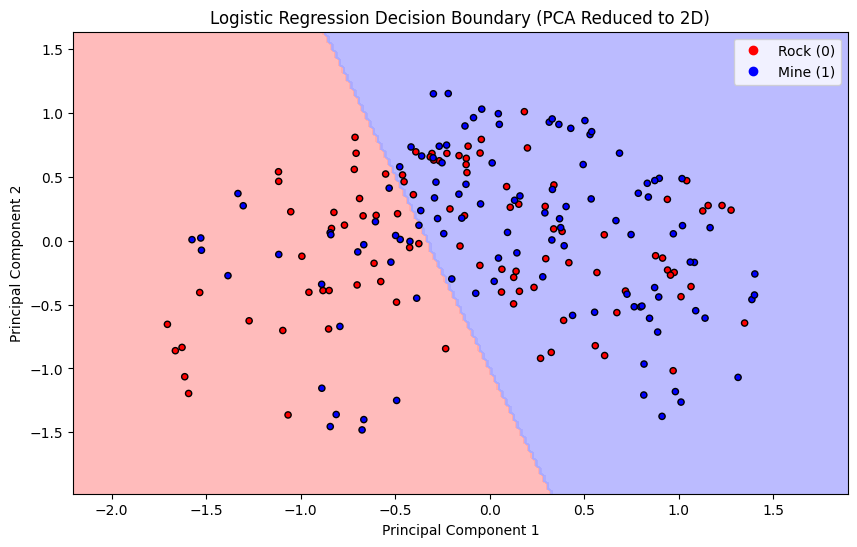

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 1. PREPARE THE DATA FOR PLOTTING
# We need to turn the 'M' and 'R' labels into numbers (0 and 1) for plotting colors
y_numeric = Y.map({'R': 0, 'M': 1})

# Use PCA to reduce the 60 features down to just 2 features (Components)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 2. TRAIN A NEW MODEL ON THE 2D DATA
# We train a new model just for this visualization because
# the original model works in 60 dimensions, not 2.
model_2d = LogisticRegression()
model_2d.fit(X_reduced, y_numeric)

# 3. CREATE THE BACKGROUND GRID (THE DECISION BOUNDARY)
# Create a meshgrid to show the decision areas
x_min, x_max = X_reduced[:, 0].min() - 0.5, X_reduced[:, 0].max() + 0.5
y_min, y_max = X_reduced[:, 1].min() - 0.5, X_reduced[:, 1].max() + 0.5
h = 0.02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for every point in the grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. PLOT EVERYTHING
plt.figure(figsize=(10, 6))

# Plot the contour (the background colors separating the regions)
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF']) # Reddish and Bluish
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the actual data points
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric,
                      edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#0000FF']))

# Add labels and legend
plt.title('Logistic Regression Decision Boundary (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, ['Rock (0)', 'Mine (1)'])

plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

# 1. Define the "knobs" we want to tune
# 'C' is the strength of regularization. We try small and large values.
# 'solver' is the math algorithm used to optimize. 'liblinear' works well for small datasets like Sonar.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],            # Try both L1 (Lasso) and L2 (Ridge) regularization
    'solver': ['liblinear']             # Good solver for small datasets
}

# 2. Setup the Grid Search
# cv=5 means "Cross Validation": it splits data into 5 parts to double-check accuracy
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# 3. Fit the model (This replaces model.fit)
grid_search.fit(X_train, Y_train)

# 4. View results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 5. Test the best model on your test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, Y_test)
print("Accuracy on Test Data (Optimized):", test_accuracy)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.7965860597439545
Accuracy on Test Data (Optimized): 0.7619047619047619


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 1. Setup the Pipeline (Scaler + Model)
# The pipeline behaves just like a model, but it automatically scales new data for you.
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Step 1: Scale
    ('model', LogisticRegression())    # Step 2: Logistic Regression
])

# 2. Define parameters for GridSearch
# Note: We must add 'model__' prefix to parameters so GridSearch knows they belong to the model step.
param_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['liblinear']
}

# 3. Run Grid Search
# We pass the UN-SCALED X_train here. The pipeline handles the scaling internally.
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, Y_train) # Note: X_train here is the raw split data

print("Best Accuracy:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Accuracy: 0.7862019914651494
Best Parameters: {'model__C': 0.1, 'model__solver': 'liblinear'}


. The King: C (Inverse Regularization Strength)
Think of C as the "Strictness" knob for your model. It controls how much you let the model "memorize" the training data.

High C (e.g., C=100, C=1000): "The Lenient Teacher"

What it says: "I trust the training data completely. Try to get every single point correct, even the weird ones."

Result: The model creates a very wiggly, complex boundary.

Risk: Overfitting. It memorizes the noise in your Rock/Mine data.

Low C (e.g., C=0.01, C=0.001): "The Strict Teacher"

What it says: "Don't overthink it. Just find the general trend. I don't care if you miss a few weird points, keep the line simple."

Result: The model creates a straight, simple boundary.

Risk: Underfitting. It might be too simple to distinguish tricky Rocks from Mines.

Rule of Thumb: Start with C=1.0 (the default). If your model is overfitting (high train score, low test score), lower C (e.g., 0.1).

2. The Queen: penalty (Regularization Type)
This controls how the model punishes complex data. There are two main types you need to know for your Sonar project.

l2 (Ridge): The "Shrinker" (Default)

What it does: It keeps all 60 of your sonar features, but it forces their mathematical "weight" to be small.

Best for: When you think all your features are somewhat useful (usually the safe bet).

l1 (Lasso): The "Deleter"

What it does: It looks at your 60 features and says, "Feature #5 and Feature #32 are useless," and sets their weight effectively to zero. It literally ignores them.

Best for: Feature Selection. If you suspect only 10 of your 60 columns actually matter, use l1.

3. The Mechanic: solver
This is just the math engine under the hood. You usually change this only to make the other two work.

liblinear: Use this for small datasets (like your Sonar data). It handles l1 and l2 penalties very well.

lbfgs: The default for big datasets, but it often only supports l2.

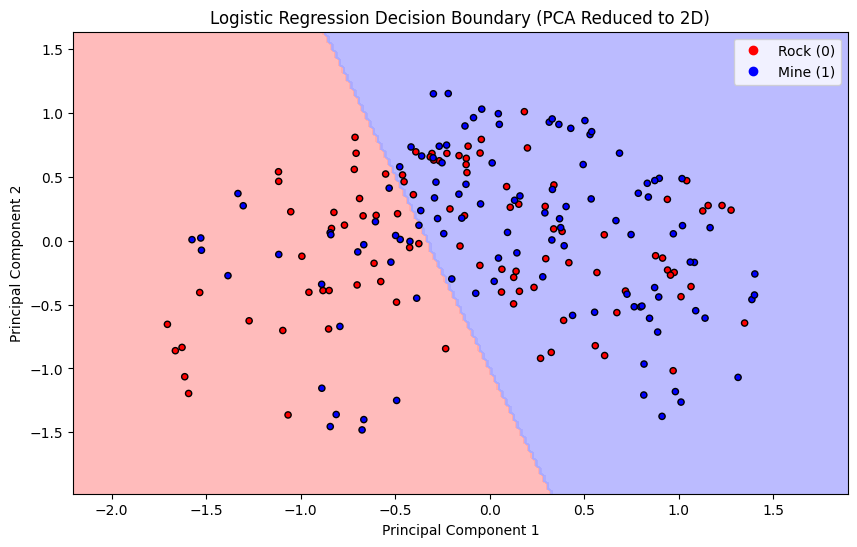

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 1. PREPARE THE DATA FOR PLOTTING
# We need to turn the 'M' and 'R' labels into numbers (0 and 1) for plotting colors
y_numeric = Y.map({'R': 0, 'M': 1})

# Use PCA to reduce the 60 features down to just 2 features (Components)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 2. TRAIN A NEW MODEL ON THE 2D DATA
# We train a new model just for this visualization because
# the original model works in 60 dimensions, not 2.
model_2d = LogisticRegression()
model_2d.fit(X_reduced, y_numeric)

# 3. CREATE THE BACKGROUND GRID (THE DECISION BOUNDARY)
# Create a meshgrid to show the decision areas
x_min, x_max = X_reduced[:, 0].min() - 0.5, X_reduced[:, 0].max() + 0.5
y_min, y_max = X_reduced[:, 1].min() - 0.5, X_reduced[:, 1].max() + 0.5
h = 0.02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for every point in the grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. PLOT EVERYTHING
plt.figure(figsize=(10, 6))

# Plot the contour (the background colors separating the regions)
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF']) # Reddish and Bluish
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the actual data points
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric,
                      edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#0000FF']))

# Add labels and legend
plt.title('Logistic Regression Decision Boundary (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, ['Rock (0)', 'Mine (1)'])

plt.show()

In [31]:
# Assuming your model is already trained
train_acc = model.score(X_train, Y_train)
test_acc = model.score(X_test, Y_test)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy:     {test_acc:.2f}")

diff = train_acc - test_acc
if diff > 0.10:
    print("WARNING: Likely Overfitting (Gap > 10%)")
elif train_acc < 0.70:
    print("WARNING: Likely Underfitting (Low Accuracy)")
else:
    print("Result: Good Fit")

Training Accuracy: 0.83
Test Accuracy:     0.76
Result: Good Fit


In [32]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['M']
The object is a mine


In [33]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='rbf'),  # 'rbf' allows curved boundaries
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

print("Model Comparison:")
for name, model in models.items():
    # Train
    model.fit(X_train, Y_train) # Remember to use X_train (Scaled)

    # Test
    acc = model.score(X_test, Y_test)
    print(f"{name}: {acc*100:.2f}%")

Model Comparison:
Logistic Regression: 76.19%
Support Vector Machine: 80.95%
Random Forest: 71.43%


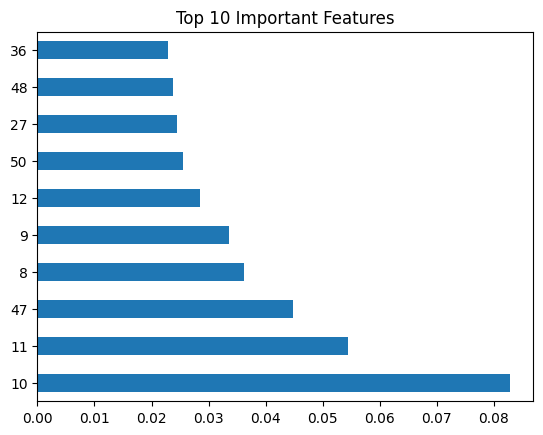

In [34]:
# Train a Random Forest
rf = RandomForestClassifier()
rf.fit(X, Y)

# Get feature importance
importances = pd.Series(rf.feature_importances_)

# Plot top 10 most important sonar frequencies
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Scale the data first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate SVM using 10-fold cross validation
scores = cross_val_score(SVC(kernel='rbf'), X_scaled, Y, cv=10)

print(f"Real Average Accuracy: {scores.mean()*100:.2f}%")

Real Average Accuracy: 68.31%
